<a href="https://colab.research.google.com/github/helenamartinez/UFMS/blob/main/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> Análise Exploratória <h2>

--- Informações do Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None


--- Estatísticas Descritivas ---


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


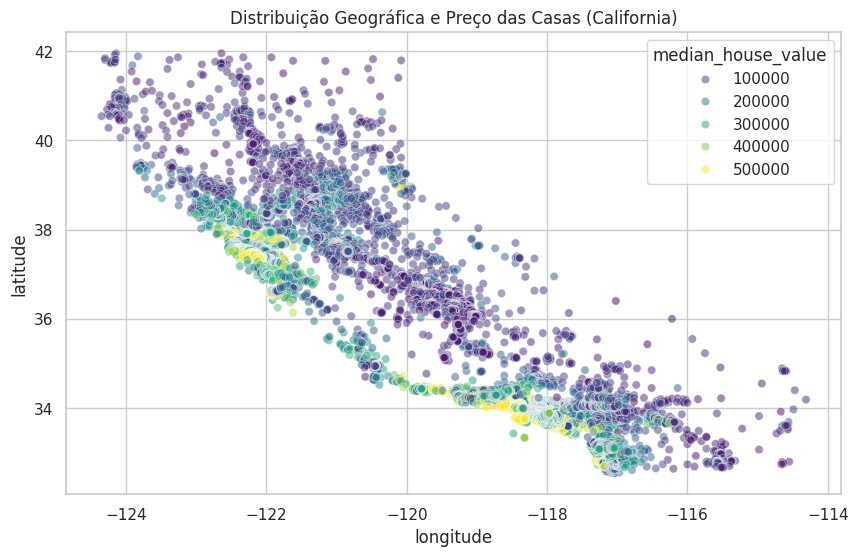

In [1]:
# 1. Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Configuração visual
sns.set(style="whitegrid")

# 2. Carregamento dos dados
df = pd.read_csv('housing.csv')

# 3. Análise Exploratória Inicial
print("--- Informações do Dataset ---")
display(df.info())

print("\n--- Estatísticas Descritivas ---")
display(df.describe())

# 4. Tratamento de Dados
# Preenchendo 'total_bedrooms' com a mediana por caus dos nulos.
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

# Visualização da distribuição espacial (Latitude x Longitude)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', alpha=0.5, hue='median_house_value', palette='viridis')
plt.title('Distribuição Geográfica e Preço das Casas (California)')
plt.show()

<h2> Pré-processamento <h2>

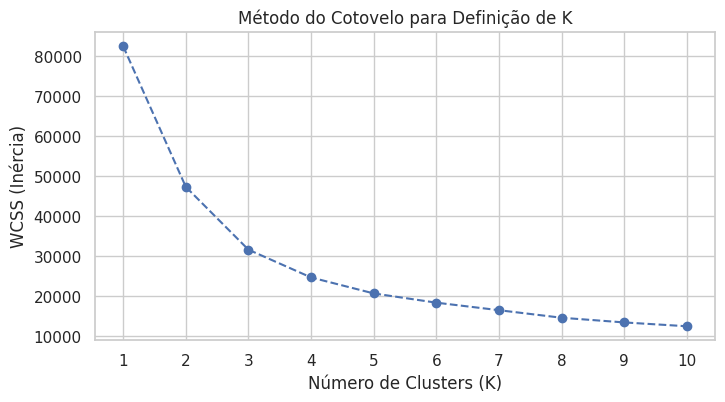

In [2]:
# 1. Seleção de Features para o Clustering
# Vamos focar em Renda, Valor da Casa e Localização para criar segmentos socioeconômicos geográficos
features_to_cluster = ['median_income', 'latitude', 'longitude', 'median_house_value']
X = df[features_to_cluster]

# 2. Padronização (Escalonamento)
# K-means usa distância Euclidiana. Se não escalarmos, o 'median_house_value' dominará o cálculo.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Método do Cotovelo (Elbow Method)
wcss = [] # Within-Cluster Sum of Square (Inércia)
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Gráfico do Cotovelo
plt.figure(figsize=(8, 4))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo para Definição de K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS (Inércia)')
plt.xticks(K_range)
plt.show()

Aqui procuro onde a curva "dobra" (o cotovelo).
Vou assumir K=5 para capturar mais (ex: áreas muito ricas, áreas médias, interior, litoral norte e sul).

<h2> K-Means <h2>

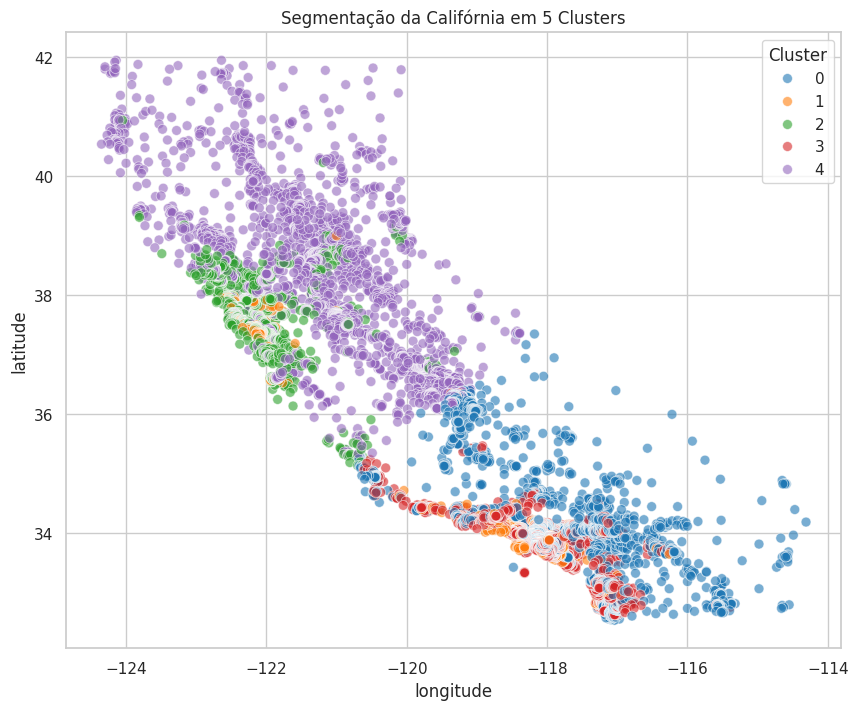

In [3]:
# 1. Aplicação do K-Means
k_escolhido = 5  # Ajuste conforme sua interpretação do gráfico do cotovelo
kmeans_final = KMeans(n_clusters=k_escolhido, random_state=42, n_init=10)

# Predição dos clusters
clusters = kmeans_final.fit_predict(X_scaled)

# Adicionando o cluster de volta ao dataframe original (para interpretação)
df['Cluster'] = clusters

# 2. Visualização Espacial dos Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='Cluster', palette='tab10', s=50, alpha=0.6)
plt.title(f'Segmentação da Califórnia em {k_escolhido} Clusters')
plt.show()

<h2> Analisando o perfil dos clusters <h2>

,median_house_value,median_income,housing_median_age,total_rooms,Count
Cluster,,,,,
1,471517.003289,9.354046,29.192982,3253.452851,912
3,300560.174105,4.985258,27.803321,3096.318111,3854
2,299894.521118,4.939029,30.371547,2955.657034,3149
0,148204.598833,2.928020,28.797992,2429.028897,7371
4,120346.973851,2.803725,27.910161,2295.490288,5354


/tmp/ipython-input-198058430.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='median_income', data=df, palette='tab10')


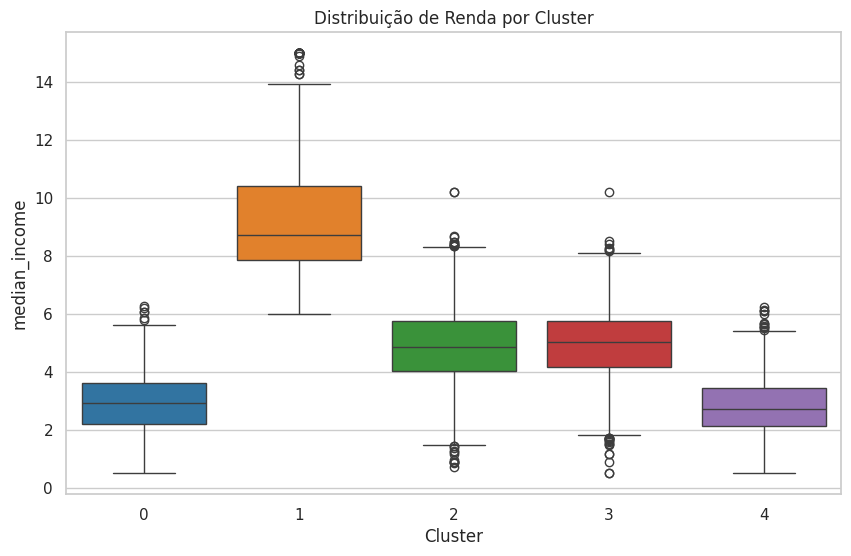

/tmp/ipython-input-198058430.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='median_house_value', data=df, palette='tab10')


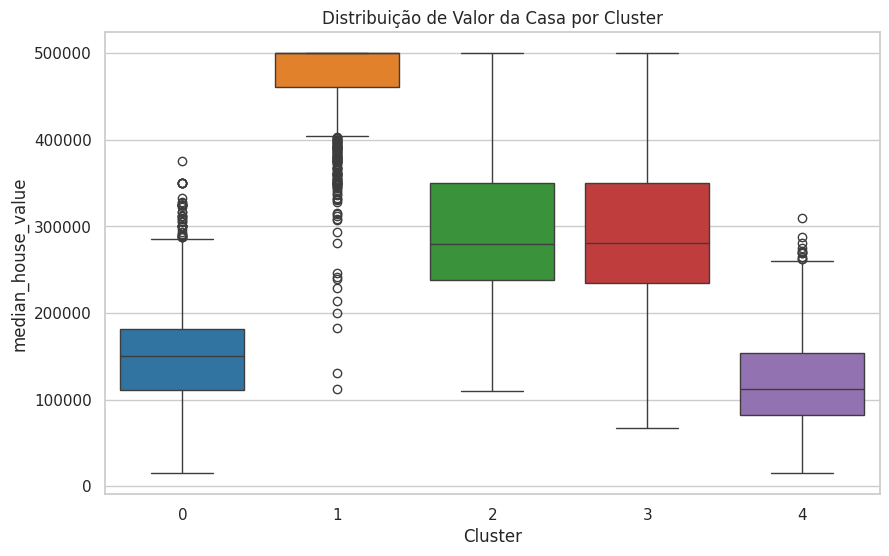

In [4]:
# Agrupando por cluster e tirando a média das variáveis originais
cluster_summary = df.groupby('Cluster')[['median_house_value', 'median_income', 'housing_median_age', 'total_rooms']].mean()
cluster_summary['Count'] = df['Cluster'].value_counts() # Quantas casas em cada cluster

display(cluster_summary.sort_values(by='median_house_value', ascending=False))

# Boxplot para comparar Renda por Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='median_income', data=df, palette='tab10')
plt.title('Distribuição de Renda por Cluster')
plt.show()

# Boxplot para comparar Preço da Casa por Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='median_house_value', data=df, palette='tab10')
plt.title('Distribuição de Valor da Casa por Cluster')
plt.show()

Cluster "Elite Praiana": É um grupo com média de valor da casa muito alta e renda alta. No mapa, eles estarão nas áreas da baía de São Francisco e Los Angeles (litoral).
<br>

Cluster "Interior/Renda Baixa": Grupo com valor de casa baixo e renda menor, localizado geograficamente mais ao interior do estado (longe do mar).

Cluster "Classe Média": Grupos intermediários que estão nas periferias das grandes cidades.

Existe uma correlação clara entre a localização (latitude/longitude) e o cluster de alto valor. O K-means conseguiu separar o litoral do interior sem que disséssemos explicitamente o que é "litoral".

O cluster mais rico tem uma variância de renda muito maior, enquanto os clusters mais pobres são mais homogêneos.

-----------------------------

Gráficos para melhor visualização, identificando e comprovando visualmente isso

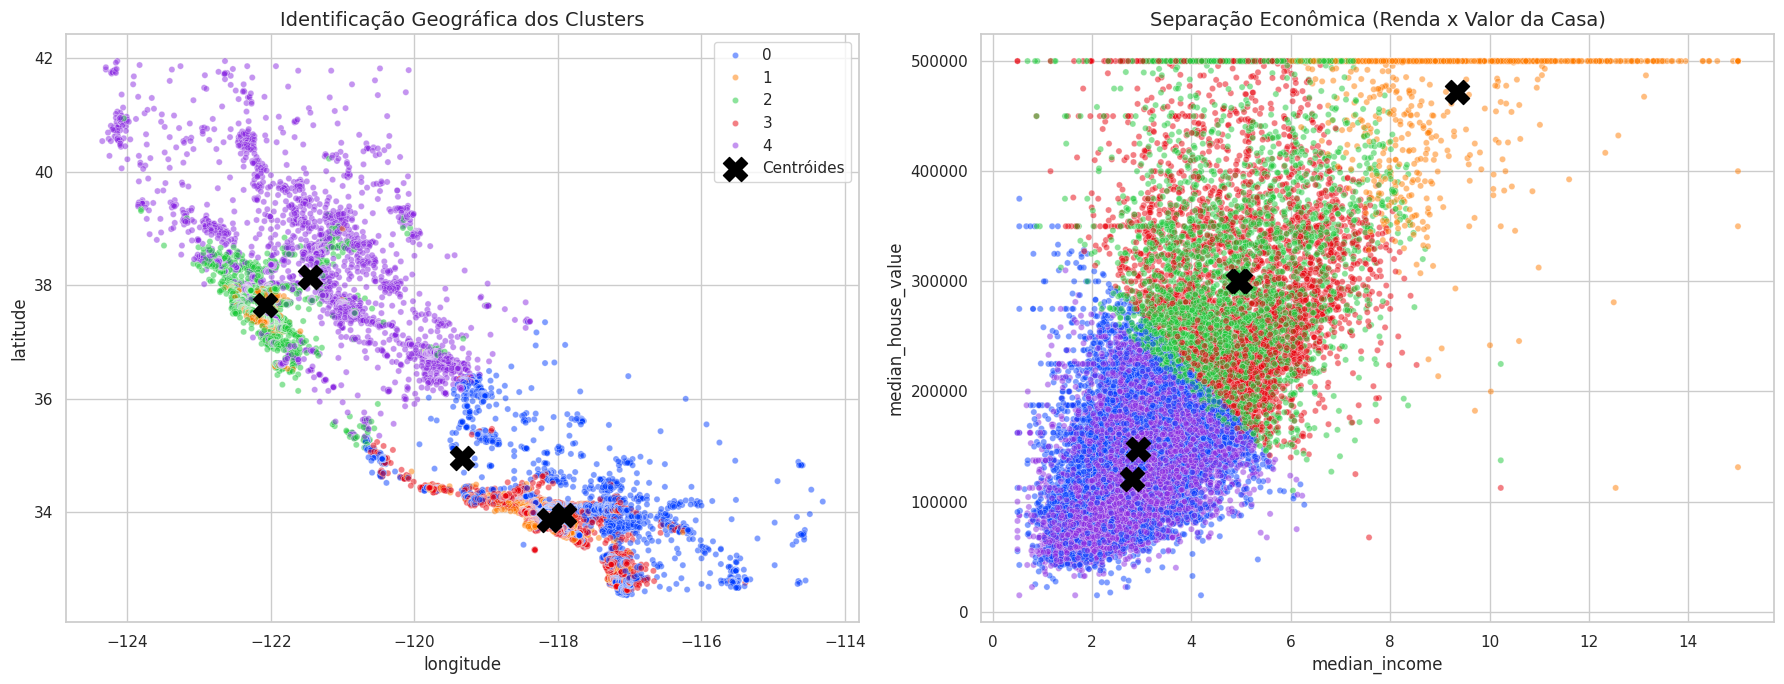

In [6]:
# Recuperando os centróides (o "ponto médio" de cada grupo)
# Precisamos desfazer a escala (inverse_transform) para plotar no gráfico original
centroides_scaled = kmeans_final.cluster_centers_
centroides_real = scaler.inverse_transform(centroides_scaled)
df_centroides = pd.DataFrame(centroides_real, columns=features_to_cluster)

# Configurando a área de plotagem
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# --- GRÁFICO 1: O MAPA (Geografia) ---
sns.scatterplot(data=df, x='longitude', y='latitude', hue='Cluster',
                palette='bright', alpha=0.5, s=20, ax=ax[0], legend='full')

# Plotando os Centróides no Mapa (Marcados com X preto)
# Nota: longitude é a coluna 2 e latitude é a coluna 1 em 'features_to_cluster'
ax[0].scatter(df_centroides['longitude'], df_centroides['latitude'],
              s=300, c='black', marker='X', label='Centróides')

ax[0].set_title('Identificação Geográfica dos Clusters', fontsize=14)
ax[0].legend()

# --- GRÁFICO 2: O PERFIL ECONÔMICO (Dinheiro) ---
sns.scatterplot(data=df, x='median_income', y='median_house_value', hue='Cluster',
                palette='bright', alpha=0.5, s=20, ax=ax[1], legend=False)

# Plotando os Centróides Econômicos
ax[1].scatter(df_centroides['median_income'], df_centroides['median_house_value'],
              s=300, c='black', marker='X')

ax[1].set_title('Separação Econômica (Renda x Valor da Casa)', fontsize=14)

plt.tight_layout()
plt.show()